In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import pandas_market_calendars as mcal
import datetime
import math

In [2]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=300) #52 week analysis
nyse = mcal.get_calendar('NYSE')
valid_dates = nyse.valid_days(start_date=start_date, end_date =end_date)
valid_start_day = valid_dates[0].date()
valid_end_day = valid_dates[-1].date()

top_100_us_stocks = [
    "AAPL", "NVDA", "MSFT", "GOOG", "AMZN", "META", "LLY", "TSM", "AVGO",
    "TSLA", "JPM", "WMT", "SONY", "UNH", "V", "XOM", "NVO", "MA", "PG", "JNJ", "COST",
    "ORCL", "HD", "ASML", "ABBV", "BAC", "KO", "MRK", "NFLX", "AZN", "CVX", "SMFG",
    "SAP", "CRM", "ADBE", "TM", "NVS", "PEP", "AMD", "TMUS", "TMO", "LIN", "ACN",
    "MCD", "CSCO", "ABT", "WFC", "BABA", "INTC", "IBM", "QCOM", "NVS", "UPS", "HON",
    "AMGN", "SBUX", "PFE", "INTU", "FDX", "MDT", "CHTR", "TGT", "LMT", "AMT", "WBA",
    "TFC", "TXN", "BLK", "CVS", "NOW", "SBAC", "MU", "ISRG", "GM", "DHR", "TJX",
    "ADI", "PYPL", "ZTS", "DUK", "CAT", "LOW", "PLD", "MS", "EL", "FIS", "ADP",
    "SO", "BDX", "MDLZ", "FDX", "GS", "SCHW", "KEP", "NEE", "CL", "BKNG", "CSX",
    "ADI", "ICE", "MCO", "EA", "GD", "TFC", "TD", "AON", "WDAY", "APD", "EQIX",
    "KMB", "CCI", "ETN", "SYK", "SPGI", "HUM", "EMR", "INTC", "NSC", "EXC", "WM",
    "BMY", "FISV", "LRCX", "VZ", "ROST", "EW", "PGR", "STZ", "AEP", "KLAC", "BSX",
    "APTV", "MU", "AIG", "ORLY", "NSC", "AFL",
]

#S&P 500 ticker
SnP_componet_ticker = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol

# Energy Stocks
Energy_Stocks = ["XOM", "CVX", "BP", "COP", "EOG", "SLB", "OXY", "VLO", "OKE", "HAL", "PSX", "MPC", "LNG", "WMB", "APA", "EQT", "NOV", "MRO"]

# Materials Stocks
Materials_Stocks = ["APD", "SHW", "NEM", "LYB", "ECL", "MOS", "PPG", "FCX", "IP", "MLM", "NUE", "CTVA", "ALB", "FMC", "CE", "AEM", "CF", "MOS"]

# Industrials Stocks
Industrials_Stocks = ["BA", "MMM", "UPS", "CAT", "HON", "GE", "LMT", "RTX", "EMR", "UNP", "CSX", "DE", "ITW", "GD", "ETN", "PH", "ROK", "FDX", "CMI", "WM"]

# Consumer Discretionary Stocks
Consumer_Discretionary_Stocks = ["AMZN", "NKE", "TSLA", "HD", "MCD", "SBUX", "LULU", "NFLX", "EBAY", "DIS", "GM", "BKNG", "ORLY", "MAR", "ROST", "YUM", "DG", "AZO", "TPR", "CCL"]

# Consumer Staples Stocks
Consumer_Staples_Stocks = ["PG", "KO", "PEP", "WMT", "COST", "PM", "MO", "MDLZ", "KHC", "CL", "EL", "GIS", "KMB", "SYY", "STZ", "CLX", "HSY", "K", "WBA", "TSN"]

# Health Care Stocks
Health_Care_Stocks = ["JNJ", "PFE", "UNH", "MRK", "ABBV", "TMO", "ABT", "LLY", "AMGN", "BMY", "GILD", "CVS", "ISRG", "BDX", "VRTX", "DHR", "ZTS", "REGN", "BIIB"]

# Financials Stocks
Financials_Stocks = ["JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "BLK", "PNC", "USB", "MET", "CB", "MMC", "SPGI", "CME", "AIG", "TRV", "COF", "DFS", "AFL"]

# Information Technology Stocks
Information_Technology_Stocks = ["AAPL", "MSFT", "GOOGL", "TSM", "V", "NVDA", "ADBE", "INTC", "CSCO", "IBM", "CRM", "ORCL", "ACN", "TXN", "PYPL", "AVGO", "QCOM", "AMD", "NOW"]

# Communication Services Stocks
Communication_Services_Stocks = ["GOOGL", "DIS", "NFLX", "T", "NFLX", "CHTR", "CMCSA", "EA", "FOXA", "ROKU", "SIRI", "ZM", "SNAP", "PTON", "TTWO"]

# Utilities Stocks
Utilities_Stocks = ["NEE", "D", "DUK", "SO", "EXC", "AEP", "SRE", "XEL", "ED", "EIX", "WEC", "PEG", "FE", "AWK", "CNP", "NI", "AES", "DTE", "OGE"]

# Real Estate Stocks
Real_Estate_Stocks = ["SPG", "PLD", "CCI", "EQIX", "PSA", "AVB", "WELL", "DLR", "O", "CBRE", "ARE", "IRM", "EQR", "BXP", "VTR", "UDR", "EXR", "REG", "AIV"]

Combine_stocks = Energy_Stocks + Materials_Stocks + Industrials_Stocks + Consumer_Discretionary_Stocks + Consumer_Staples_Stocks + Health_Care_Stocks + Financials_Stocks + Information_Technology_Stocks + Communication_Services_Stocks + Utilities_Stocks + Real_Estate_Stocks

def final_ticker(T_list):
    return list(set(T_list))

index_funds = ["VTI", "SPY", "VOO", "IWM", "VEA", "VWO", "EFA", "EEM", "BND", "VNQ"]

#index_banch_mart = ["^GSPC"]
index_banch_mart = ["SPY"]

tickers = final_ticker(SnP_componet_ticker[:300])
df = yf.download(tickers,start = valid_start_day)["Open"]
df = df.dropna(axis=1, how='any')
df_BM = yf.download(index_banch_mart,start = valid_start_day)["Open"]
number_of_stocks = df.shape[1]
print('removed ticker with nan values')

[**********************49%%                      ]  148 of 300 completed

$BF.B: possibly delisted; No price data found  (1d 2024-01-02 -> 2024-10-24)


[*********************100%%**********************]  300 of 300 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-02 -> 2024-10-24)')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

removed ticker with nan values


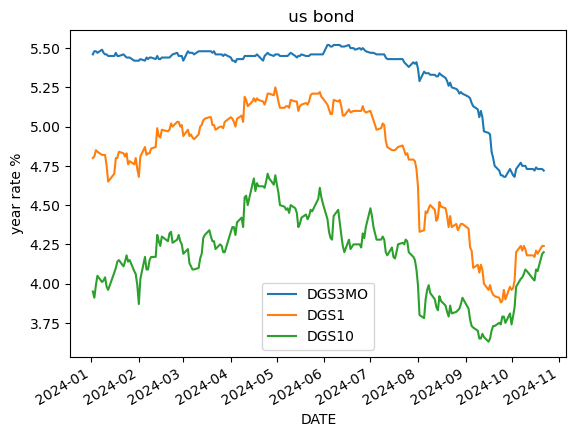

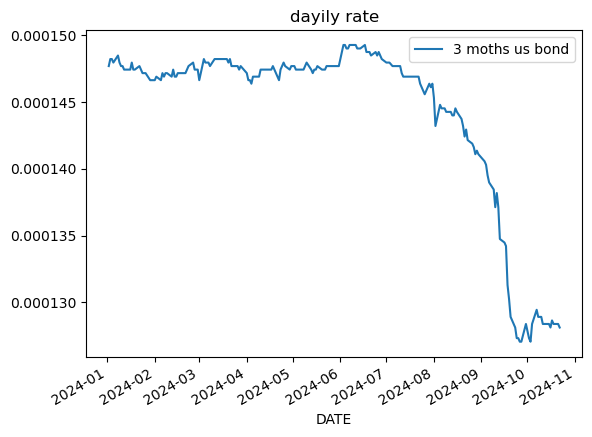

In [4]:
US_TB = ['DGS3MO', 'DGS1', 'DGS10'] #3 months, 1 year, 10 years

df_bonds = pdr.DataReader(US_TB, 'fred', valid_start_day, valid_end_day).dropna()
df_bonds["3month_cts_rate"] = (1+df_bonds["DGS3MO"]/100)**(1/360) -1 
risk_free_rate = df_bonds["3month_cts_rate"]

df_bonds["DGS3MO"].plot(title = " us bond", ylabel="year rate %")
#df_bonds["3month_cts_rate"].plot()
df_bonds["DGS1"].plot( )
df_bonds["DGS10"].plot( )
plt.legend()
plt.show()

risk_free_rate.plot(label = "3 moths us bond", title="dayily rate")
#df_bonds["3month_cts_rate"].plot()
plt.legend()
plt.show()

In [5]:
ret_df = np.log(df/df.shift(1)).dropna()
ret_df_BM = np.log(df_BM/df_BM.shift(1)).dropna()

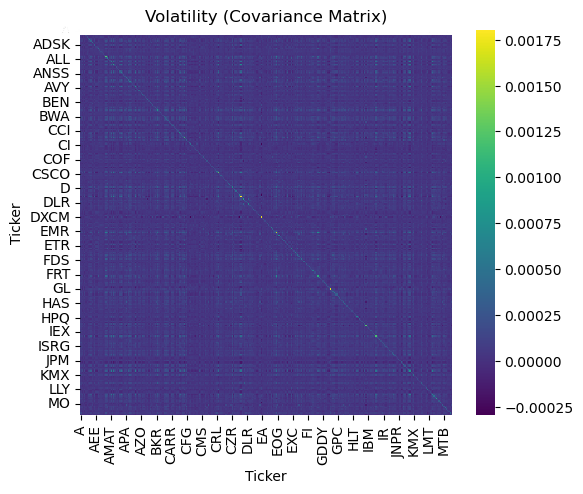

In [6]:
Covarian_matrix = ret_df.cov()
plt.figure(figsize=(6, 5))
sns.heatmap(Covarian_matrix, annot=True, cmap='viridis', fmt='.2e')
plt.title('Volatility (Covariance Matrix)')
plt.show()

Optimization Time

In [8]:
def Sharpe_pf(Weight,return_df,risk_free_rate):
    pf_risk = np.sqrt(Weight.dot(return_df.cov().dot(Weight)))
    pf_mean = return_df.mean().dot(Weight)
    if type(risk_free_rate) != int:
        risk_free_rate = risk_free_rate.mean()
    return -(pf_mean-risk_free_rate)/pf_risk
def Expected_return(Weight,return_df):
    return return_df.dot(Weight).cumsum().dropna()

In [9]:
T_fraction = 0.92 # ( 11/12, hold 1 month)
def split_train_test(df,BM,rfr,Fraction):
    def Log_return(df):
        return np.log(df/df.shift(1)).dropna()
    
    common_indices = df.index.intersection(rfr.index)
    df = df.loc[common_indices]
    common_indices = BM.index.intersection(rfr.index)

    df = df.loc[common_indices]
    rfr = rfr.loc[common_indices]
    BM = BM.loc[common_indices]

    matched_len = len(df)
    Train_len = int(matched_len*Fraction)
    
    train = Log_return(df[:Train_len])
    test = Log_return(df[Train_len:])
    rfr = rfr[1:] # match length
    
    BM_train = Log_return(BM[:Train_len])
    BM_test = Log_return(BM[Train_len:])

    rfr_train = rfr[:Train_len]
    rfr_test = rfr[Train_len:]

    return train, BM_train, rfr_train, test, BM_test, rfr_test 

Train, BM_train, Train_rfr, Test, BM_test, Test_rfr = split_train_test(df, df_BM, risk_free_rate, T_fraction)

In [10]:
cons = ({"type":"eq", "fun":lambda x:np.sum(x) - 1})

In [11]:
W_0 = np.ones(number_of_stocks)/number_of_stocks
Train_result = minimize(Sharpe_pf,W_0,args=(Train,Train_rfr), bounds=Bounds(0,1),constraints = cons)
W_opt_train = Train_result["x"]

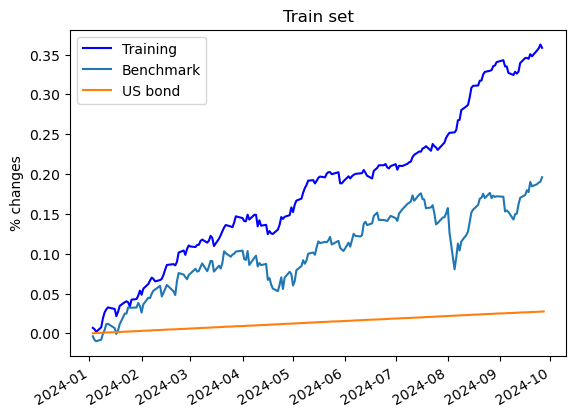

In [12]:
ER_train  = Expected_return(W_opt_train,Train)
ER_train.plot(c="b",title="Train set",ylabel="% changes",label="Training")
BM_train.cumsum().plot(label="Benchmark")
((1+Train_rfr).cumprod()-1).plot(label="US bond")
plt.legend()
plt.show()

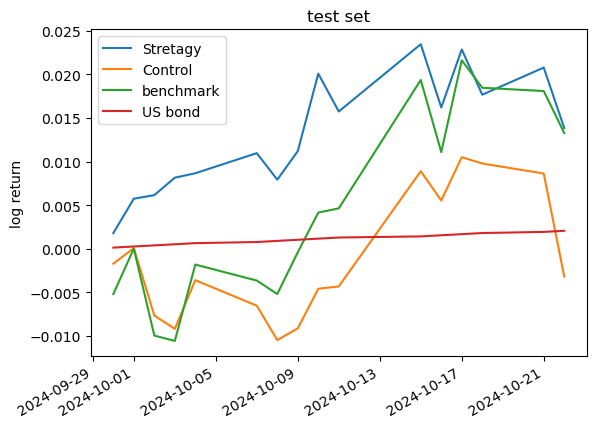

In [13]:
ER_Test  = Expected_return(W_opt_train,Test)
ER_final = ER_Test.to_list()[-1]
sharpe_ratio = -Sharpe_pf(W_opt_train,Test,Test_rfr)

ER_control = Expected_return(W_0,Test)
ER_control_final = ER_control.to_list()[-1]
Control_shape_ratio = -Sharpe_pf(W_0,Test,Test_rfr)

BM_cumsum_final = BM_test.cumsum().tolist()[-1]

ER_Test.plot(title="test set",ylabel="log return",label="Stretagy")
ER_control.plot(label="Control")
BM_test.cumsum().plot(label="benchmark")
((1+Test_rfr).cumprod()-1).plot(label="US bond")
plt.legend()
plt.show()

In [14]:
print(f"The return for the test data is {ER_final*100:.2f}% with sharpe ratio {sharpe_ratio:.3f}")
print(f"Control return is {ER_control_final*100:.2f}% with sharpe ratio {Control_shape_ratio:.3f}")
print(f"Benchmark return is {BM_cumsum_final*100:.2f}%")
print(f"US bond return is {Test_rfr.iloc[-1]*100:2f}%")

The return for the test data is 1.38% with sharpe ratio 0.147
Control return is -0.32% with sharpe ratio -0.057
Benchmark return is 1.33%
US bond return is 0.012812%


In [15]:
def What_Should_I_buy(Ticker,Weight):
    buy_list = {}
    lower_limit = 0.08
    Weight_adj = [X if X >= lower_limit else 0 for X in Weight]
    Weight_og = Weight_adj
    Weight_adj = 1/sum(Weight_adj)*np.array(Weight_adj)
    
    print(f"The threshold is {lower_limit}")
    print("you should buy:")
    print("-------------------------")
    
    for T, W in zip(Ticker, Weight_adj):
        if W > lower_limit:
            buy_list[T] = W
            print(f"W_{T} =  {W:.2f}")
    print("-------------------------")
    print(f" Sum to {sum(Weight_og)}")
    return buy_list
print("For the test set")
Test_buy_list = What_Should_I_buy(tickers,W_opt_train)


For the test set
The threshold is 0.08
you should buy:
-------------------------
W_KKR =  0.40
W_ECL =  0.33
W_HST =  0.28
-------------------------
 Sum to 0.29422670518087557


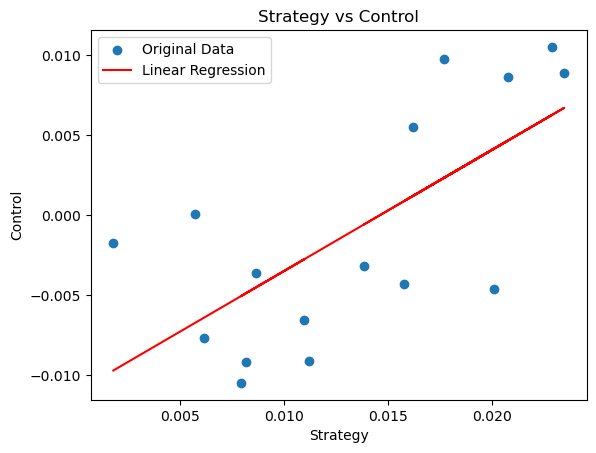

alpha and beta are -0.011, 0.757


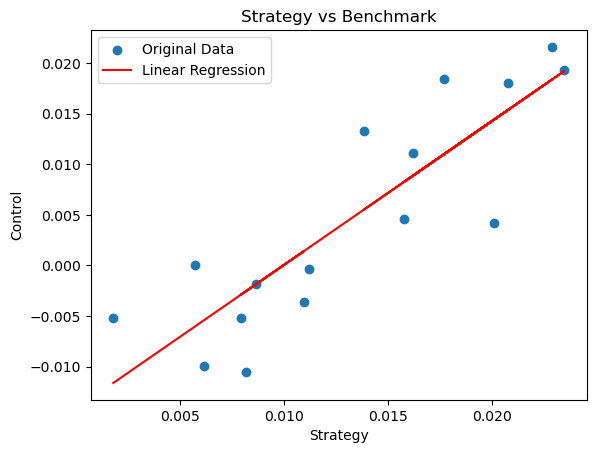

alpha and beta are -0.014, 1.424


In [16]:
import Functions.AlphaBeta as MT
plt.title("Strategy vs Control")
alpha, beta = MT.AlphaBeta(ER_Test.to_list(),ER_control.to_list(),0,plot=True)
print(f"alpha and beta are {alpha}, {beta}")

plt.title("Strategy vs Benchmark")
alpha, beta = MT.AlphaBeta(ER_Test.to_list(),BM_test.cumsum().to_list(),0,plot=True)
print(f"alpha and beta are {alpha}, {beta}")


In [17]:
opt_day = int(T_fraction*365)
Today_rfr_opt = risk_free_rate.iloc[-opt_day:]
ret_df_opt = ret_df.iloc[-opt_day:]
Final_result = minimize(Sharpe_pf,W_0,args=(ret_df_opt,Today_rfr_opt), bounds=Bounds(0,1),constraints = cons)
W_opt_final = Final_result["x"]

In [18]:
mylist = What_Should_I_buy(tickers,W_opt_final)
print("Overlapped stock with the test set are:")
for X in mylist:
    if X in Test_buy_list:
        print(f"Delta_W_{X} = {(Test_buy_list[X]-mylist[X]):.2f}")
print("------------------------")

The threshold is 0.08
you should buy:
-------------------------
W_KKR =  0.33
W_ECL =  0.30
W_LRCX =  0.37
-------------------------
 Sum to 0.333108287105845
Overlapped stock with the test set are:
Delta_W_KKR = 0.06
Delta_W_ECL = 0.03
------------------------


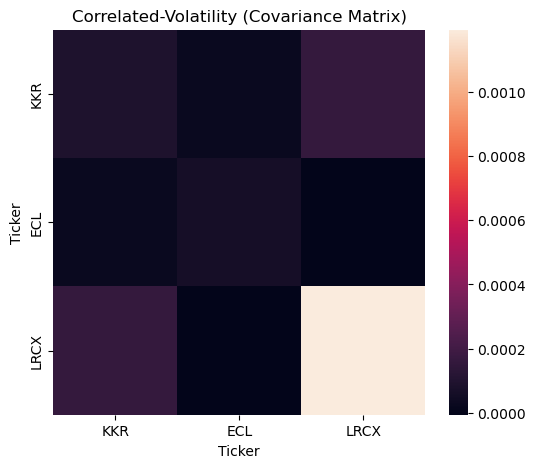

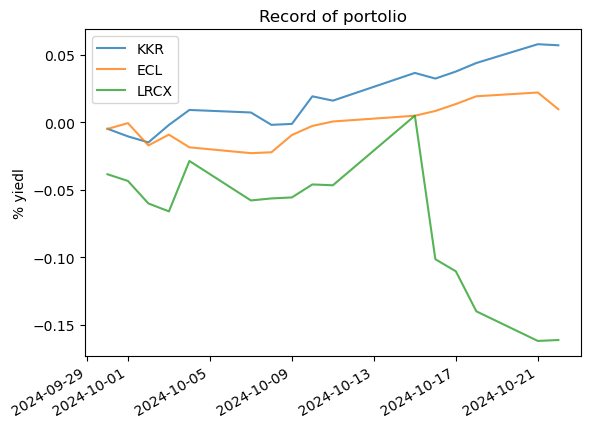

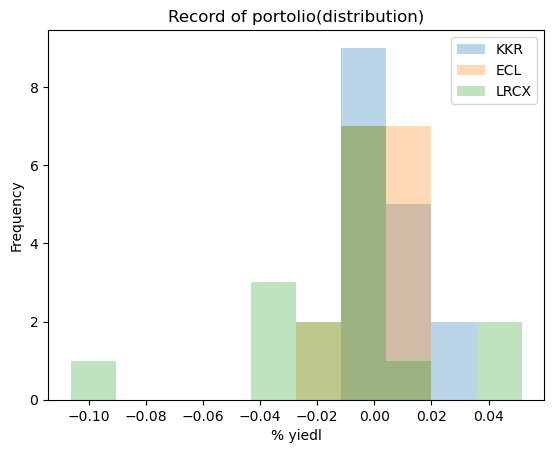

KKR : mean=3.5627e-03, var=9.1758e-05, skewness=0.614
ECL : mean=6.0312e-04, var=6.3375e-05, skewness=-0.854
LRCX : mean=-1.0075e-02, var=1.1949e-03, skewness=-1.063


In [19]:
def track_record(your_list):
    ticker = list(mylist.keys())

    
    Covarian_matrix = Test[ticker].cov()
    plt.figure(figsize=(6, 5))
    heatmap = sns.heatmap(Covarian_matrix, annot=False, fmt=".2e", annot_kws={"size": 9},cbar=True)
    plt.title('Correlated-Volatility (Covariance Matrix)')
    plt.show()

    Test[ticker].cumsum().plot(label=ticker,ylabel="% yiedl",title="Record of portolio", alpha =0.8)
    plt.legend()
    plt.show()

    mean = Test[ticker].mean()
    variance = Test[ticker].var()
    skewness = Test[ticker].skew()

    Test[ticker].plot.hist(label=ticker,xlabel="% yiedl",title="Record of portolio(distribution)",bins=10, alpha =0.3)
    plt.legend()
    plt.show()
    for i in range(len(ticker)):
        print(f"{ticker[i]} : mean={mean.values[i]:.4e}, var={variance.values[i]:.4e}, skewness={skewness.values[i]:.3f}" )


track_record(mylist)

In [20]:
def How_much_money_I_need_now(your_list):
    ticker = sorted(list(mylist.keys()))
    start_date = valid_end_day  - datetime.timedelta(days=1)
    Opens = yf.download(ticker,start = start_date)["Open"]
    n_stock = [1]*len(your_list)
    for i in range(len(ticker)):
        n_stock[i] = int(your_list[ticker[i]]*100)
    n_stock = np.array(n_stock)
    GCD = math.gcd(max(n_stock),min(n_stock))
    for i in range(len(n_stock)):
        GCD = math.gcd(GCD,n_stock[i])
    n_stock = n_stock/GCD
    prices = np.array(Opens.values[0])
    Need_Cash = sum(n_stock*prices)
    print("Full strategy:")
    print("Buy")
    for T, N in zip(ticker, n_stock):
        print(f"{N} stock of {T} at {Opens[T].values[0]:.2f}")
        print(f"portfolio weighting = {N*Opens[T].values[0]/Need_Cash*100} %")
        print("---------------------------------------------")
    print(f"Total cash needed is {Need_Cash:.2f} USD")
    print("=================================================")


    
    rounded_n_stock = np.array([float(round(x/10)) for x in n_stock])
    Need_Cash_simple = sum(rounded_n_stock*prices)
    print("Simple strategy:")
    print("Buy")
    for k in range(len(ticker)):
        print(f"{rounded_n_stock[k]} stock of {ticker[k]} at {Opens[ticker[k]].values[0]:.2f}")
        print(f"portfolio weighting = {rounded_n_stock[k]*Opens[ticker[k]].values[0]/Need_Cash_simple*100} %")
        print("------------------------------------------------")
    print(f"Total cash(Simple) needed is {Need_Cash_simple:.2f} USD")
    
How_much_money_I_need_now(mylist)

[*********************100%%**********************]  3 of 3 completed

Full strategy:
Buy
29.0 stock of ECL at 257.50
portfolio weighting = 50.01574050969364 %
---------------------------------------------
33.0 stock of KKR at 143.04
portfolio weighting = 31.61570661685287 %
---------------------------------------------
36.0 stock of LRCX at 76.18
portfolio weighting = 18.368552873453492 %
---------------------------------------------
Total cash needed is 14930.30 USD
Simple strategy:
Buy
3.0 stock of ECL at 257.50
portfolio weighting = 51.283243471145326 %
------------------------------------------------
3.0 stock of KKR at 143.04
portfolio weighting = 28.487591463315496 %
------------------------------------------------
4.0 stock of LRCX at 76.18
portfolio weighting = 20.22916506553918 %
------------------------------------------------
Total cash(Simple) needed is 1506.34 USD


Risk management

In [22]:
from Functions import MC_sims

In [144]:
def Price_projection(your_list,forcast_day):
    tickers = sorted(list(your_list.keys()))
    n_sims = 2**15
    start_date = valid_end_day - datetime.timedelta(days=300)
    Sims = {}
    Return = []
    lost_2q = []
    gain_2q = []
    for ticker in tickers:
        Opens = yf.download(ticker,start = start_date)["Open"]
        MC_sim = MC_sims.MC_simulation(Opens,forcast_day,n_sims)
        Sims[ticker] = MC_sim
        Return.append(MC_sim['walk_mean'].iloc[-1]/Opens.iloc[-1])
        lost_2q.append(MC_sim['2_sigma_lower'].iloc[-1]/Opens.iloc[-1])
        gain_2q.append(MC_sim['2_sigma_upper'].iloc[-1]/Opens.iloc[-1])
        
    print(f'mena return = {(sum(Return)-len(tickers))*100:2f}%')
    print(f'2q lost = {(sum(lost_2q)-len(tickers))*100:2f}%')
    print(f'2q gain = {(sum(gain_2q)-len(tickers))*100:2f}%')
    return Sims

In [146]:
Sims = Price_projection(mylist,7)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


mena return = 3.204936%
2q lost = -31.793873%
2q gain = 35.593850%


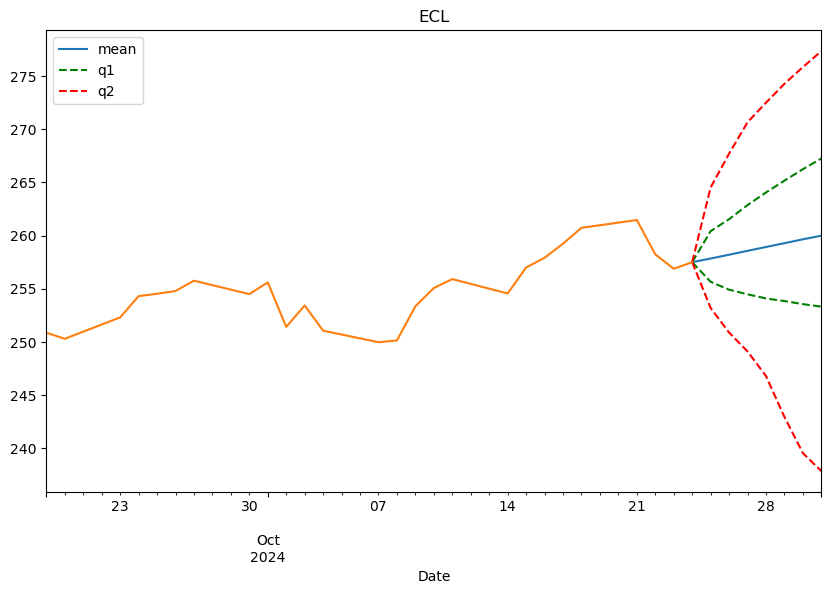

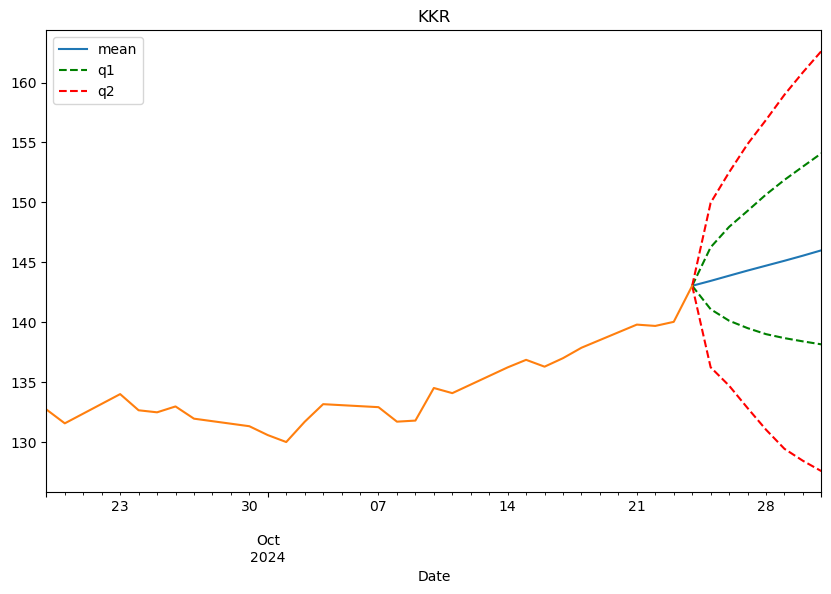

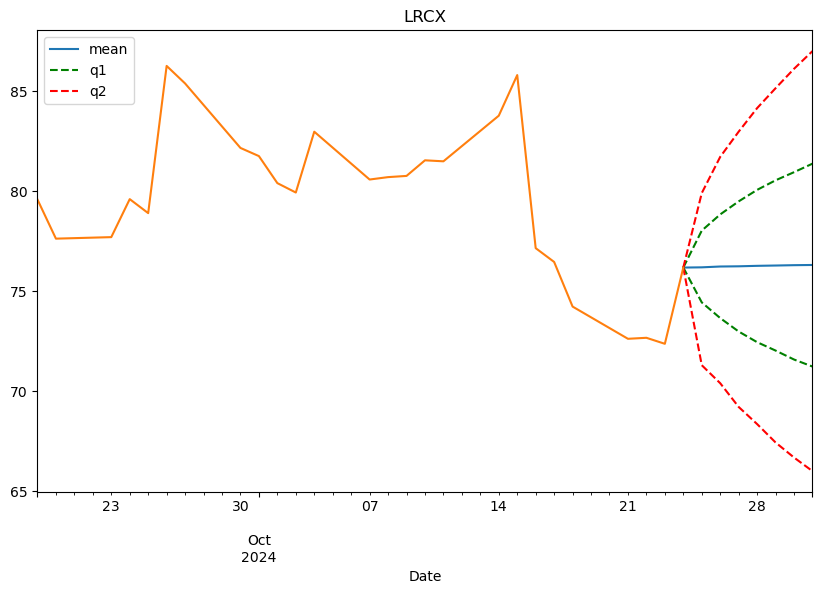

In [156]:
for S in Sims:
    plt.figure(figsize=(10, 6))
    Sims[S]['walk_mean'].plot(title=S,label = 'mean')
    Sims[S]['1_sigma_lower'].plot(label='q1',style='--',color = 'g')
    Sims[S]['2_sigma_lower'].plot(label='q2',style='--',color = 'r')
    plt.legend()
    Sims[S]['1_sigma_upper'].plot(label='q1',style='--',color = 'g')
    Sims[S]['2_sigma_upper'].plot(label='q2',style='--',color = 'r')
    
    df[S][-26:].plot()
    plt.show()